# Data visualization: Nagios faulty, not-faulty states

In [1]:
from examon.examon import ExamonQL
from itables import show
import itables.options as opt
opt.maxBytes = 0

%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from matplotlib.ticker import MaxNLocator
register_matplotlib_converters()

#local library
from library import nagios_sampling as ns
from library import date_utils as du
from library import examon_utils as eu

<IPython.core.display.Javascript object>

#### Examon setup

In [2]:
sq = eu.create_examon_connection()

# Nagios: sampling from 15 to 5 minutes
Each nagios data is replicated 3 times updating the timestamp properly.<br>
For esample:    <b>0&emsp;2019-10-08 15:15:00+02:00&emsp;node1&emsp;2</b><br>

is replicated in this way:
<ol>
    <li><b>0&emsp;2019-10-08 15:05:00+02:00&emsp;node1&emsp;2</b></li>
    <li><b>0&emsp;2019-10-08 15:10:00+02:00&emsp;node1&emsp;2</b></li>
    <li><b>0&emsp;2019-10-08 15:15:00+02:00&emsp;node1&emsp;2</b></li>
</ol>


### Plugin nagios_pub
Extracting data from nagios_pub when a critical state is matched (state=2):
<ul>
    <li>DOWN<sup>(*)</sup>,</li>
    <li>DOWN<sup>(*)</sup>+DRAIN,</li>
    <li>IDLE<sup>(*)</sup>+DRAIN,</li>
    <li>ALLOCATED+DRAIN,</li>
    <li>MIXED+COMPLETING+DRAIN,</li>
    <li>or any other combination of them</li>
</ul>

Considered time: 15 days

In [55]:
updated_data = ns.extract_data_from_nagios(sq=sq, node='r183c11s01', t_start='21-10-2019 00:00:00', t_stop='04-11-2019 00:00:00')
updated_data
updated_data[updated_data['label'] == 1]

,timestamp,label
3067,2019-10-31 14:35:00+01:00,1
3068,2019-10-31 14:40:00+01:00,1
3069,2019-10-31 14:45:00+01:00,1
3892,2019-11-03 11:20:00+01:00,1
3893,2019-11-03 11:25:00+01:00,1
...,...,...
3956,2019-11-03 16:40:00+01:00,1
3957,2019-11-03 16:45:00+01:00,1
3958,2019-11-03 16:50:00+01:00,1
3959,2019-11-03 16:55:00+01:00,1


In [33]:
updated_data[updated_data['label'] == 1]

,timestamp,label


#### Manual extraction:

In [5]:
node='r183c12s04'
t_start='07-10-2019 00:00:00'
t_stop='05-11-2019 00:00:00'

In [6]:
data = ns.make_nagios_query(sq=sq, node=node, states='2', t_start=t_start, t_stop=t_stop)
du.remove_seconds_and_microseconds_from_timestamp(data, inplace=True)

,timestamp,value,name,node,state
0,2019-10-07 00:00:00+02:00,DOWN+DRAIN matches a critical state,plugin_output,r183c12s04,2
1,2019-10-07 00:15:00+02:00,DOWN+DRAIN matches a critical state,plugin_output,r183c12s04,2
2,2019-10-07 00:30:00+02:00,DOWN+DRAIN matches a critical state,plugin_output,r183c12s04,2
3,2019-10-07 00:45:00+02:00,DOWN+DRAIN matches a critical state,plugin_output,r183c12s04,2
4,2019-10-07 01:00:00+02:00,DOWN+DRAIN matches a critical state,plugin_output,r183c12s04,2
...,...,...,...,...,...
195,2019-11-03 16:45:00+01:00,"C(/marconi_scratch[df=1]) W() O(/marconi,/marc...",plugin_output,r183c12s04,2
196,2019-11-03 16:45:00+01:00,IDLE+DRAIN matches a critical state,plugin_output,r183c12s04,2
197,2019-11-03 17:00:00+01:00,"C(/marconi_scratch[df=1]) W() O(/marconi,/marc...",plugin_output,r183c12s04,2
198,2019-11-03 17:00:00+01:00,IDLE+DRAIN matches a critical state,plugin_output,r183c12s04,2


In [8]:
show(data, scrollX=True)

timestamp,value,name,node,state


In [9]:
critical_states = ns.extract_nagios_criticality_from_examon(sq=sq, node=node, t_start=t_start, t_stop=t_stop)
show(critical_states, scrollX=True)

timestamp,value,name,node,state


In [10]:
nagios_5_minute_labels = ns.generate_critical_nagios_5_minute_labels(critical_states)
show(nagios_5_minute_labels, scrollX=True)

timestamp,label


In [11]:
first_timestamp = du.parse_timestamp(t_start)
last_timestamp = du.parse_timestamp(t_stop)
all_timestamps = du.generate_timestamps(first_timestamp, last_timestamp, minute_step=5)
all_timestamps

0      2019-10-07 00:00:00+02:00
1      2019-10-07 00:05:00+02:00
2      2019-10-07 00:10:00+02:00
3      2019-10-07 00:15:00+02:00
4      2019-10-07 00:20:00+02:00
                  ...           
8360   2019-11-04 23:40:00+01:00
8361   2019-11-04 23:45:00+01:00
8362   2019-11-04 23:50:00+01:00
8363   2019-11-04 23:55:00+01:00
8364   2019-11-05 00:00:00+01:00
Length: 8365, dtype: datetime64[ns, Europe/Rome]

In [12]:
import pandas as pd
all_timestamps = pd.DataFrame(data=all_timestamps, columns=['timestamp'])
all_timestamps

,timestamp
0,2019-10-07 00:00:00+02:00
1,2019-10-07 00:05:00+02:00
2,2019-10-07 00:10:00+02:00
3,2019-10-07 00:15:00+02:00
4,2019-10-07 00:20:00+02:00
...,...
8360,2019-11-04 23:40:00+01:00
8361,2019-11-04 23:45:00+01:00
8362,2019-11-04 23:50:00+01:00
8363,2019-11-04 23:55:00+01:00


In [13]:
labeled_data = ns.insert_labels(all_timestamps, nagios_5_minute_labels)
show(labeled_data, scrollX=True)

timestamp,label


# Data Visualization

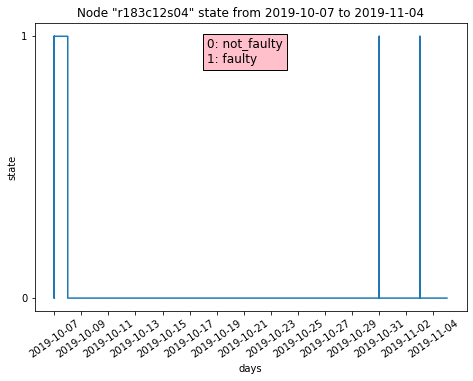

In [36]:
import matplotlib.ticker as mticker
import numpy as np

# useful for plotting notes
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

# corresponding x axis values 
x = du.extract_dates_from_timestamps(updated_data['timestamp'])

# corresponding y axis values 
y = updated_data['label']

# plotting the points  
plt.plot(x, y) 

days = []
i = 0
x=x.unique()
while i < len(x):
    days.append(x[i])
    i+=2

#days.append(x[-1])
x = np.asarray(days)
    
# naming the x and y axis and title
plt.xlabel('days') 
plt.ylabel('state') 
plt.title('Node "r183c12s04" state from 2019-10-07 to 2019-11-04') 

# display only unique values
plt.yticks(y.unique())
plt.xticks(x, rotation=35)

# display legend
plt.text(0.4, 0.9,
         '0: not_faulty\n1: faulty',
         bbox={'facecolor': 'pink'}, fontsize=12,
         horizontalalignment='left',
         verticalalignment='center',
         transform = ax.transAxes)

# save the plot
plt.savefig('plot.png', dpi=200, transparent=True)

# show the plot 
plt.show() 

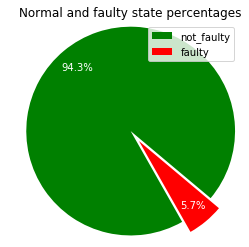

In [50]:
total_data = updated_data.shape[0]
total_criticalities = updated_data[updated_data['label'] == 1].shape[0]
total_not_critical = total_data - total_criticalities

# defining labels 
activities = ['not_faulty', 'faulty'] 
  
# portion covered by each label 
slices = [total_not_critical, total_criticalities] 

# color for each label 
colors = ['g', 'r'] 
  
# plotting the pie chart 
plt.pie(slices, labels = activities, colors=colors,  
        startangle=-40, shadow = False, explode = (0, 0.15), 
        radius = 1.2, autopct = '%1.1f%%', pctdistance=0.8, textprops=dict(color="w")) 

plt.title('Normal and faulty state distibution')  

# plotting legend 
plt.legend() 
  
# showing the plot
plt.savefig('pieplot.png', dpi=200, transparent=True)
plt.show() 